# **Práctica 8: Árboles. Parte 1**

## **Nodos y Árbol**

In [ ]:
import matplotlib.pyplot as plt

class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

class Tree:
    def __init__(self):
        self.root = None
    
    def balanced_insertion(self, value):
        new_node = Node(value)
        if self.root is None:
            self.root = new_node
            return
        
        queue = []
        queue.append(self.root)

        while True:
            father = queue[0]
            if father.left is None:
                father.left = new_node
                return
            elif father.right is None:
                father.right = new_node
                queue.pop(0)
                return
            else:
                queue.append(father.left)
                queue.append(father.right)
                queue.pop(0)

    def unbalanced_right_insertion(self, value):            # Temporal          # Espacial
        time, space = 0, 0
        time += 1
        space += 1
        new_node = Node(value)                              # 4                 # 2
        if self.root is None:                               # 5                 # 1
            space += 1
            self.root = new_node                            # 4                 # 2
            return time, space
        
        max_node, time_m, space_m = self.max(self.root)     # 5+7n+6            # 2+5
        max_node.right = new_node                           # 4                 # 2
        return time + time_m, space + space_m               # 2
        # Peor Caso:                                        = 7n + 19           = 14
        # Caso Promedio:                                    = (7n/2) + 13       = 9
        # Mejor Caso:                                       = 13                = 5

    def search(self, value):                                # Temporal          # Espacial
        time, space = 0, 0
        if self.root is None:                               # 4                 # 1
            time += 1
            return None, time, space                        # 2
        
        queue = []                                          # 1                 # 2
        queue.append(self.root)                             # 4                 # 1

        while queue:                                        # 2n                # 1n
            time += 1
            node = queue.pop(0)                             # 3n                # 2n
            if node.value == value:                         # 5n                # 1n
                return node, time, space                    # 2n
            if node.left is not None:                       # 5n                # 1n
                queue.append(node.left)                     # 4n                # 1n
                space += 1
            if node.right is not None:                      # 5n                # 1n
                queue.append(node.right)                    # 4n                # 1n
                space += 1
        return None, time, space                            # 2
        # Peor Caso:                                        # 30n+13          # 8n+3
        # Caso Promedio:                                    # 15n+10          # 4n+2
        # Mejor Caso:                                       # 6               # 1

    def min(self, node):                    # Temporal          # Espacial
        time, space = 1, 1
        current = node                      # 3                 # 2
        while current.left is not None:     # 4n                # 1
            time += 1
            current = current.left          # 3n                # 2
        return current, time, space         # 2
        # Peor Caso:                        # 7n + 6            # 5
        # Caso Promedio:                    # (4+3)n/2 + 5       # 5/2
        # Mejor Caso:                       # 9                 # 3

    def max(self, node):                    # Temporal          # Espacial
        time, space = 1, 1
        current = node                      # 3                 # 2
        while current.right is not None:    # 4n                # 1
            time += 1
            current = current.right         # 3n                # 2
        return current, time, space         # 2
        # Peor Caso:                        # 7n + 6            # 5
        # Caso Promedio:                    # (4+3)n/2 + 5       # 5/2
        # Mejor Caso:                       # 9                 # 3

    def preorder(self, node, time, space):                                          # Temporal          # Espacial
        if node is not None:                                                        # 1                 # 1
            time += 1
            space += 1
            left_values, time, space = self.preorder(node.left, time, space)        # log(n)+6          # log(n)+2
            right_values, time, space = self.preorder(node.right, time, space)      # log(n)+6          # log(n)+2
            return [node.value] + left_values + right_values, time, space           # 7
        return [], time, space                                                      # 2
        # Mejor Caso (Arbol sin nodos)                                              = 1                 # 1
        # Mejor Caso (Arbol Binario)                                                = 2log(n) + 22      # 2log(n) + 5
        # Caso Promedio                                                             = n + 11            # 2n + 5/2
        # Peor Caso                                                                 = 2n+22             # 2n + 5

    def inorder(self, node, time, space):                                           # Temporal          # Espacial
        if node is not None:                                                        # 1                 # 1
            time += 1
            space += 1
            left_values, time, space = self.inorder(node.left, time, space)         # log(n)+6          # log(n)+2
            right_values, time, space = self.inorder(node.right, time, space)       # log(n)+6          # log(n)+2
            return left_values + [node.value] + right_values, time, space           # 7
        return [], time, space                                                      # 2
    
        # Mejor Caso (Arbol sin nodos)                                              = 1                 # 1
        # Mejor Caso (Arbol Binario)                                                = 2log(n) + 22      # 2log(n) + 5
        # Caso Promedio                                                             = n + 11            # 2n + 5/2
        # Peor Caso                                                                 = 2n+22             # 2n + 5

    def postorder(self, node, time, space):                                         # Temporal          # Espacial
        if node is not None:                                                        # 1                 # 1
            time += 1
            space += 1
            left_values, time, space = self.postorder(node.left, time, space)       # log(n)+6          # log(n)+2
            right_values, time, space = self.postorder(node.right, time, space)     # log(n)+6          # log(n)+2
            return left_values + right_values + [node.value], time, space           # 7
        return [], time, space                                                      # 2
        # Mejor Caso (Arbol sin nodos)                                              = 1                 # 1
        # Mejor Caso (Arbol Binario)                                                = 2log(n) + 22      # 2log(n) + 5
        # Caso Promedio                                                             = n + 11            # 2n + 5/2
        # Peor Caso                                                                 = 2n+22             # 2n + 5
    
    def delete(self, value):                                    # Temporal          # Espacial
        time, space = 0, 0
        if self.root is None:                               # 5                 # 1
            return time, space
        
        queue = []                                          # 3                 # 2
        queue.append(self.root)                             # 4                 # 1
        node_to_delete = None                               # 3                 # 2
        last_node = None                                    # 3                 # 2
        parent_of_last = None                               # 3                 # 2

        while queue:                                        # 2n                # 1n
            time += 1
            node = queue.pop(0)                             # 5n                # 2n
            if node.value == value:                         # 5n                # 1n
                node_to_delete = node                       # 3n                # 2n
            if node.left is not None:                       # 5n                # 1n
                parent_of_last = node                       # 3n                # 2n
                last_node = node.left                       # 4n                # 2n
                queue.append(node.left)                     # 4n                # 1n
                space += 1
            if node.right is not None:                      # 5n                # 1n
                parent_of_last = node                       # 3n                # 2n
                last_node = node.right                      # 4n                # 2n
                queue.append(node.right)                    # 4n                # 1n
                space += 1

        if node_to_delete is not None:                      # 4                 # 1
            node_to_delete.value = last_node.value          # 5                 # 2
            if parent_of_last.right == last_node:           # 5                 # 1
                parent_of_last.right = None                 # 5                 # 2
            else:                                           # 1
                parent_of_last.left = None                  # 4                 # 2
        return time, space
        # Peor                Caso:                         = 47n+40            = 17n+17
        # Caso Promedio                                     = 23n+20            = 9n+9
        # Mejor Caso                                        = 5                 1       = 4n+23

    def print(self, node, prefix, is_left):
        if node is not None:
                print(prefix + ("├── " if is_left else "└── ") + str(node.value))
                prefix_son = prefix + ("│   " if is_left else "    ")
                self.print(node.left, prefix_son, True)
                self.print(node.right, prefix_son, False)

## **Pruebas**

In [9]:
# - - - - - - Creación - - - - - -

myTree = Tree()

for i in range(10):
    myTree.balanced_insertion(i)

print("Tree:")
myTree.print(myTree.root, "", True)
print()

# - - - - - - Búsqueda - - - - - -
node_search = 5
result = myTree.search(node_search)
print("El Nodo", node_search, "Fue Encontrado\n" if result else "No Fue Encontrado\n")

# - - - - - - Eliminar - - - - - -
node_search = 5
print("Eliminar", node_search)
myTree.delete(node_search)
myTree.print(myTree.root, "", True)
print()

# - - - - - - Mínimo y Máximo - - - - - -

min_node, time, space = myTree.min(myTree.root)
print("Min:", min_node.value if min_node else "Arbol vacío")
max_node, time, space = myTree.max(myTree.root)
print("Max:", max_node.value if max_node else "Arbol vacío")
print()

# - - - - - - Recorridos - - - - - -
pre, time, space = myTree.preorder(myTree.root, 0, 0)
inor, time, space = myTree.inorder(myTree.root, 0, 0)
post, time, space = myTree.postorder(myTree.root, 0, 0)
print("Preorder Traversal:", pre)
print("Inorder Traversal:", inor)
print("Postorder Traversal:", post)


Tree:
├── 0
│   ├── 1
│   │   ├── 3
│   │   │   ├── 7
│   │   │   └── 8
│   │   └── 4
│   │       ├── 9
│   └── 2
│       ├── 5
│       └── 6

El Nodo 5 Fue Encontrado

Eliminar 5
├── 0
│   ├── 1
│   │   ├── 3
│   │   │   ├── 7
│   │   │   └── 8
│   │   └── 4
│   └── 2
│       ├── 9
│       └── 6

Min: 7
Max: 6

Preorder Traversal: [0, 1, 3, 7, 8, 4, 2, 9, 6]
Inorder Traversal: [7, 3, 8, 1, 4, 0, 9, 2, 6]
Postorder Traversal: [7, 8, 3, 4, 1, 9, 6, 2, 0]


## **Peores Casos**

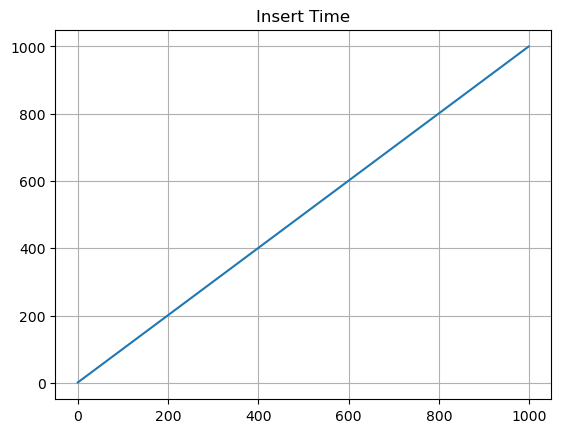

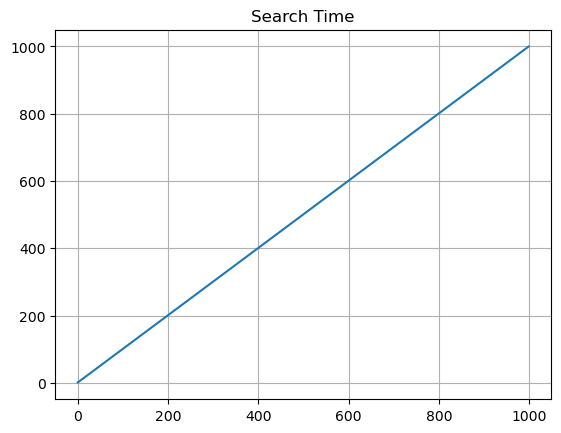

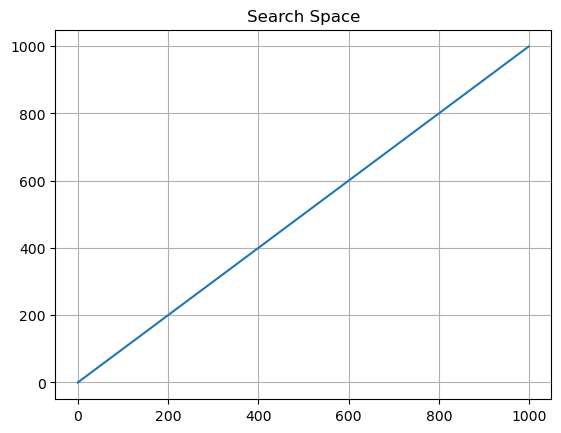

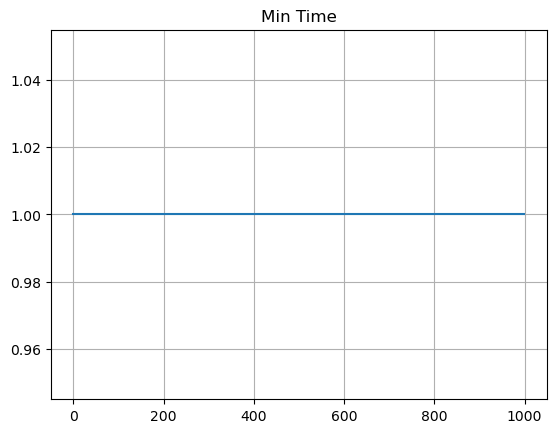

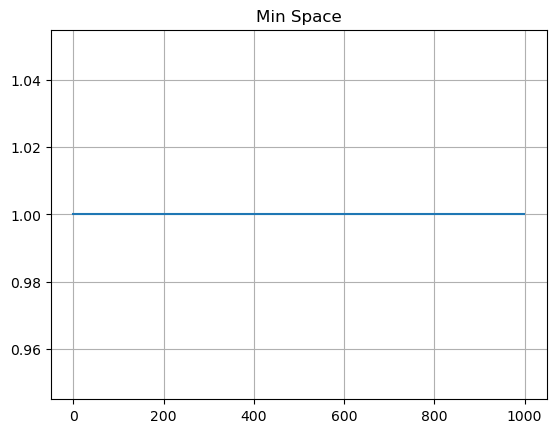

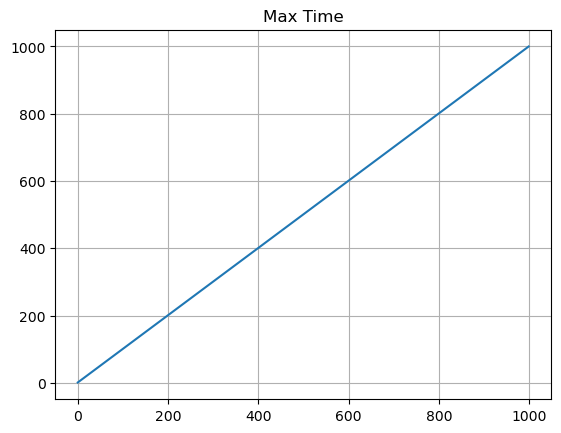

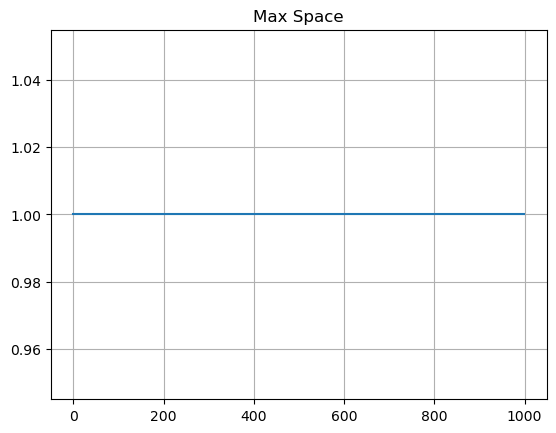

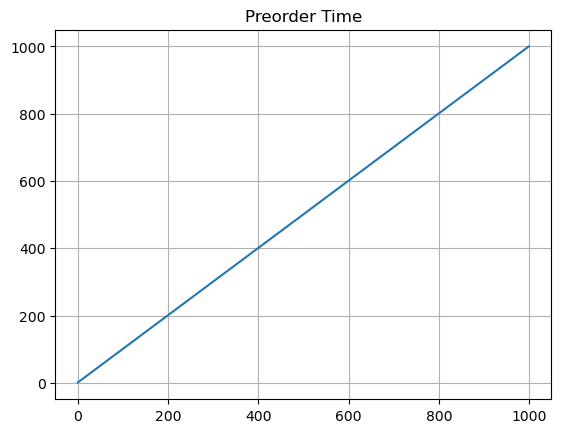

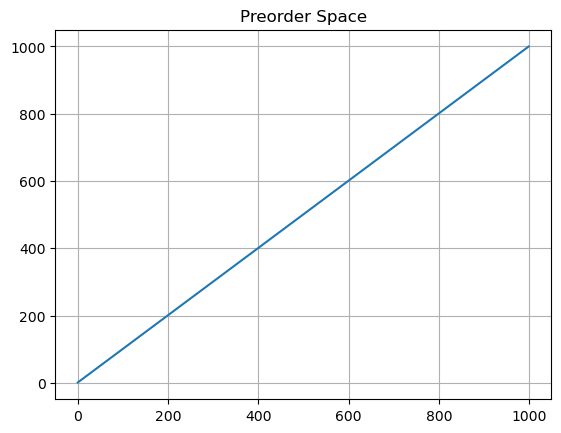

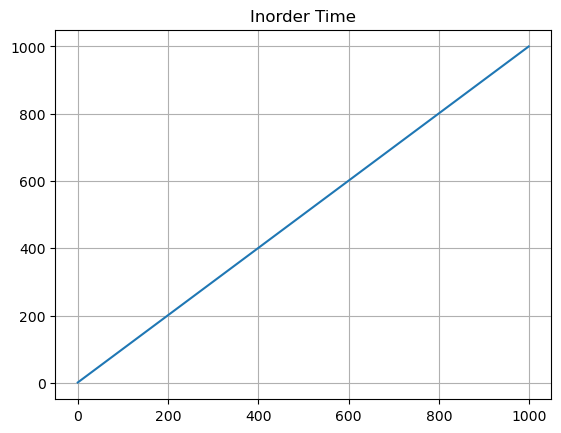

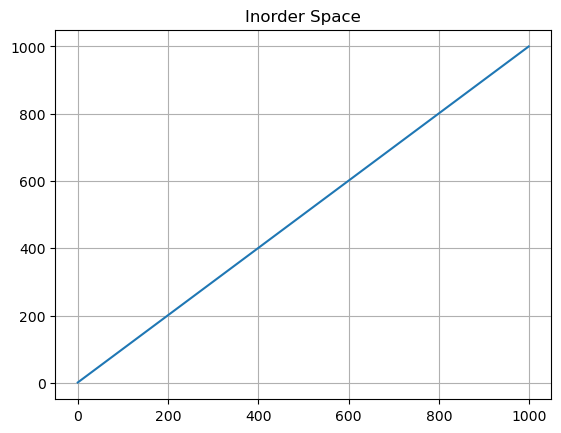

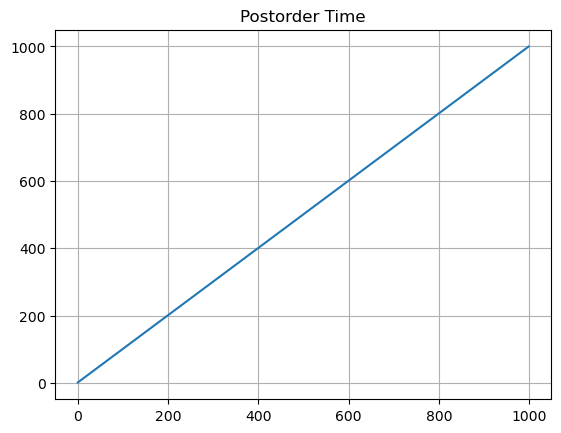

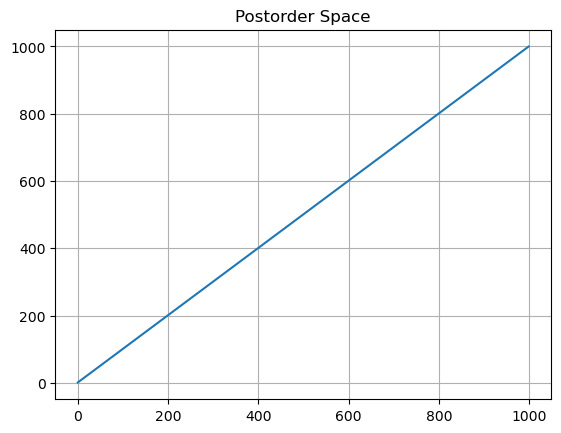

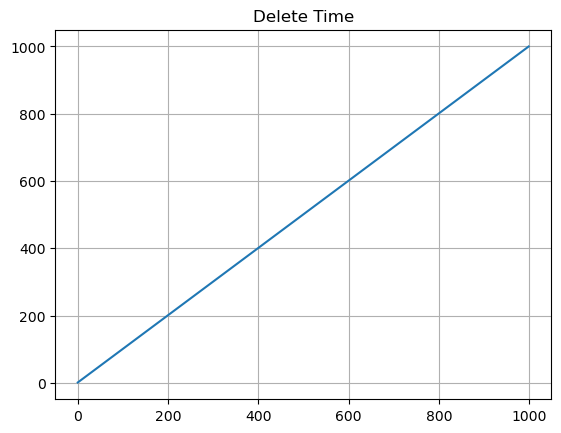

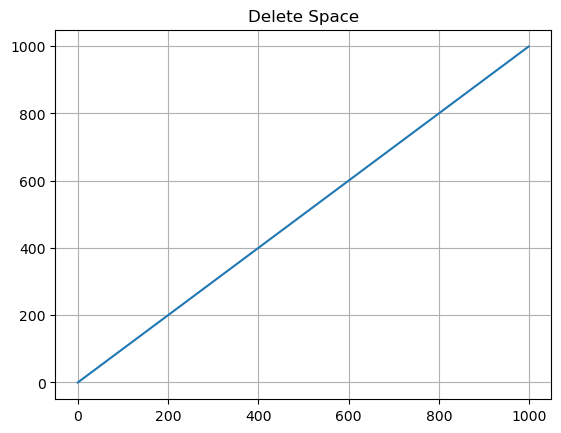

In [10]:
MAX = 1000
myTree = Tree()
x = list(range(MAX))

y = []

for i in range(MAX):
    time, space = myTree.unbalanced_right_insertion(i) # time, space
    y.append(time)
    y.append(space)
    node, time, space = myTree.search(i) # node, time, space
    y.append(time)
    y.append(space)
    node, time, space = myTree.min(myTree.root) # node, time, space
    y.append(time)
    y.append(space)
    node, time, space = myTree.max(myTree.root) # node, time, space
    y.append(time)
    y.append(space)
    arr, time, space = myTree.preorder(myTree.root, 0, 0) # arr nodes, time, space
    y.append(time)
    y.append(space)
    arr, time, space = myTree.inorder(myTree.root, 0, 0) # arr nodes, time, space
    y.append(time)
    y.append(space)
    arr, time, space = myTree.postorder(myTree.root, 0, 0) # arr nodes, time, space
    y.append(time)
    y.append(space)
    y.append(0)
    y.append(0)

for i in range(14, MAX * 16, 16):
    j = 0
    myTree = Tree()
    while j < i:
        time, space = myTree.unbalanced_right_insertion(j)
        j += 16

    time, space = myTree.delete(j) # time, space
    y[i] = time
    y[i + 1] = space

methods = ["Insert Time", "Insert Space", "Search Time", "Search Space", "Min Time", "Min Space", "Max Time", "Max Space", "Preorder Time", "Preorder Space", "Inorder Time", "Inorder Space", "Postorder Time", "Postorder Space", "Delete Time", "Delete Space"]

for j in range(0, len(methods), 2):
    time = []
    space = []

    i = j
    while i < MAX * 16:
        time.append(y[i])
        space.append(y[i + 1])
        i += 16

    plt.title(methods[j])
    plt.plot(x, time)
    plt.grid(1)
    plt.show()

    plt.title(methods[j + 1])
    plt.plot(x, space)
    plt.grid(1)
    plt.show()